<center> <h1> Week 10 - Deliverables </h1> </center>

<center><h1> Data Science:: Bank Marketing (Campaign)<br> <br>
Group Project <br><br>
EDA performed on the data<br> </h1></center>
<hr>

## Team member's details:
- Group Name: Data Girl
- Name: Fatimah Asiri
- Email: alassirifatima@gmail.com
- Country: Saudi Arabia
- College/Company: Freelancer
- Specialization:  Data Science
<hr>

## Problem description:
- ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which helps in understanding whether a particular customer will buy its product or not (based on the customer's past interaction with the bank or other Financial institutions).


## Task:

1. Business Understanding
2. Data understanding
3. Exploratory data Analysis
4. Data Preparation
5. Model Building ( Logistic Regression, ensemble, Boosting etc)
6. Model Selection
7. Performance reporting
8. Deploy the model
9. Converting ML metrics into Business metric and explaining result to business

<hr>

### 1. Business understanding
- Bank wants to use the ML model to shortlist customer whose chances of buying the product is more so that their marketing channels marketing SMS/email marketing, etc. can focus only on those customers whose chances of buying the product is more.

- This will save resources and time (which is directly involved in the cost (of resource billing).

- Develop a model with Duration and without duration features and report the performance of the model.

- The duration feature is not recommended as this will be difficult to explain the result to the business and also it will be difficult for businesses to campaign based on duration.


<hr>

### 2. Data understanding

#### 2.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


#### 2.2. Load Data

In [2]:
# read csv file by pandas
df=pd.read_csv('Bank.csv')

#### 2.3. Basics information about data

In [3]:
# to see first 5 rows in data 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<hr>

In [4]:
# to see basic infornation about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [5]:
# to know how many rows and columns
print("The Shape of Dataset:",df.shape)

The Shape of Dataset: (49732, 17)


In [6]:
# to see waht the data types for each column
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
# to Generate descriptive statistics for numeric  
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# to Generate descriptive statistics for obiect
df.describe(include=['object']) 

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,15164,40664,43922


#### 2.4. checking on missing values

In [9]:
# check on missing data in coulmns
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### 2.5. checking on dulicates rows

In [10]:
#identify duplicate rows
duplicateRows = df[df.duplicated()]
#view duplicate rows
duplicateRows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45211,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
45212,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
45213,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
45214,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
45215,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [11]:
# drop duplicates rows
df.drop_duplicates(keep=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### 2.6. Analysis the columns

In [12]:
# to see the coulmns names for dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# to see how many unique value in each columns
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [14]:
# The unquie value in coulmn (age)
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

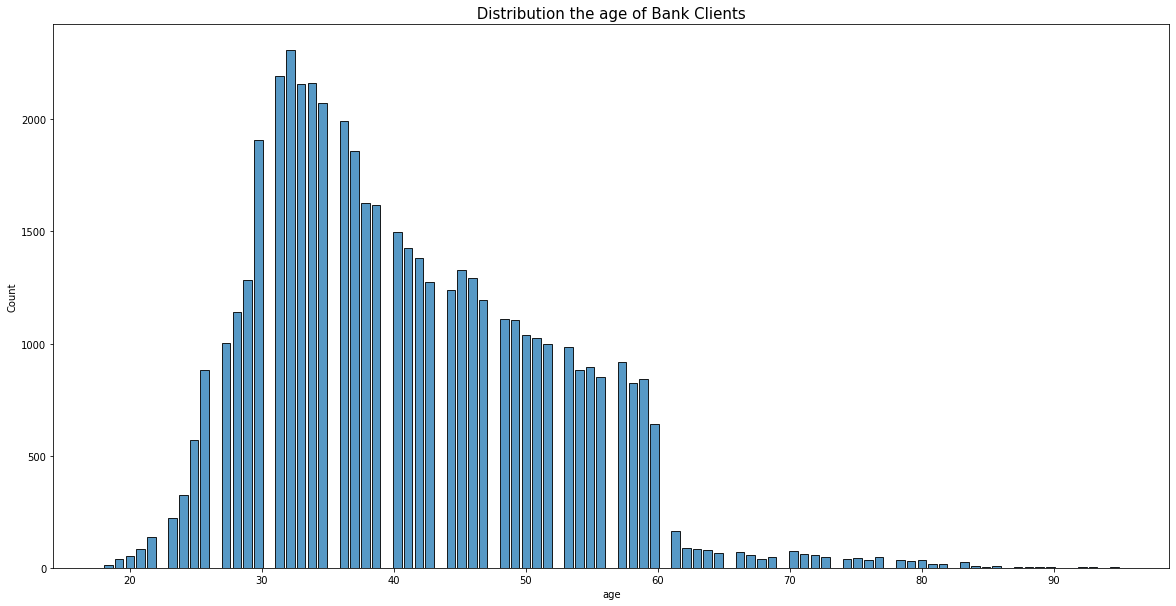

In [15]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the age of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="age" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [16]:
# The unquie value in coulmn (job)
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

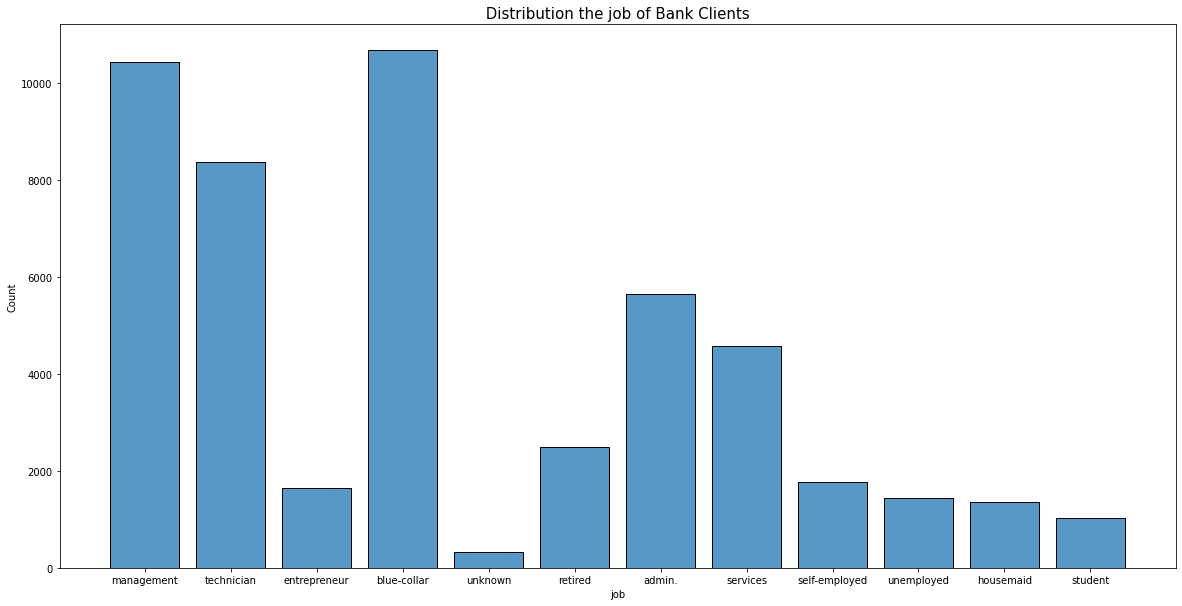

In [17]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the job of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="job" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [18]:
# The unquie value in coulmn (marital)
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

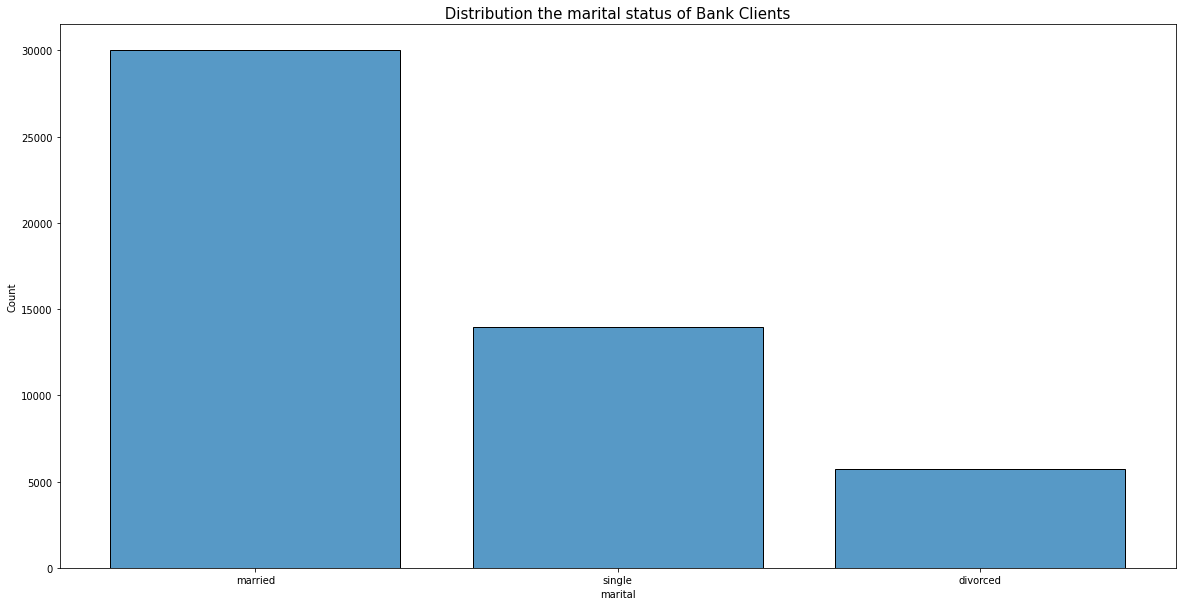

In [19]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the marital status of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="marital" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [20]:
# The unquie value in coulmn (education)
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

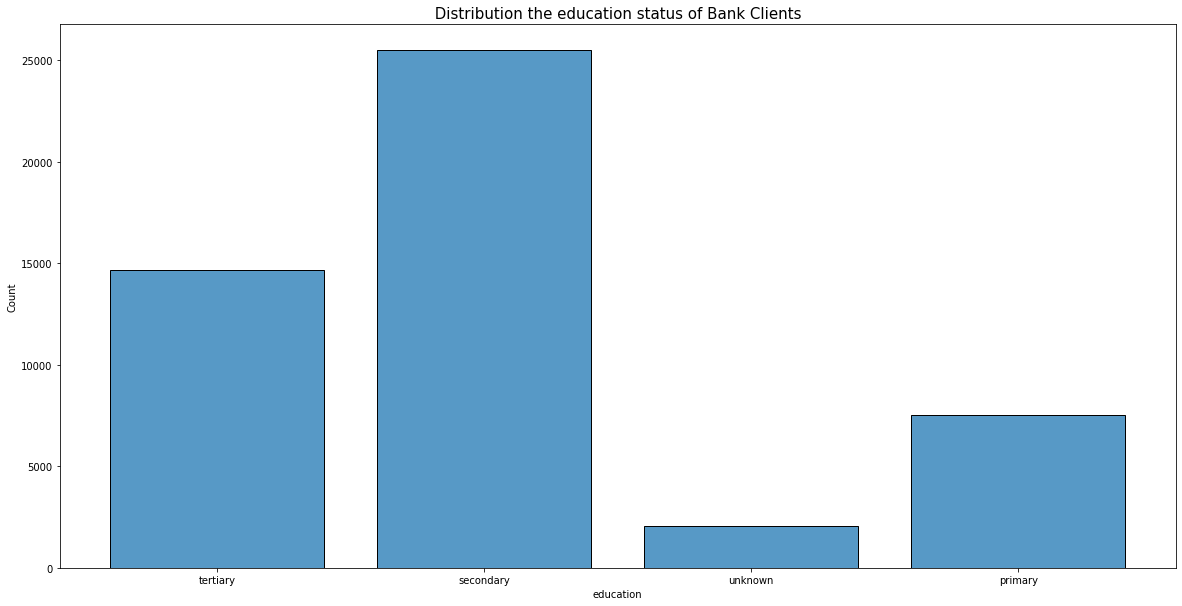

In [21]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the education status of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="education" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [22]:
# The unquie value in coulmn (default)
df['default'].unique()

array(['no', 'yes'], dtype=object)

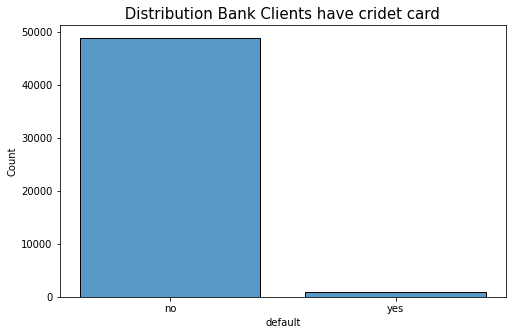

In [23]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Bank Clients have cridet card ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="default" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [24]:
# The unquie value in coulmn (balance)
df['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

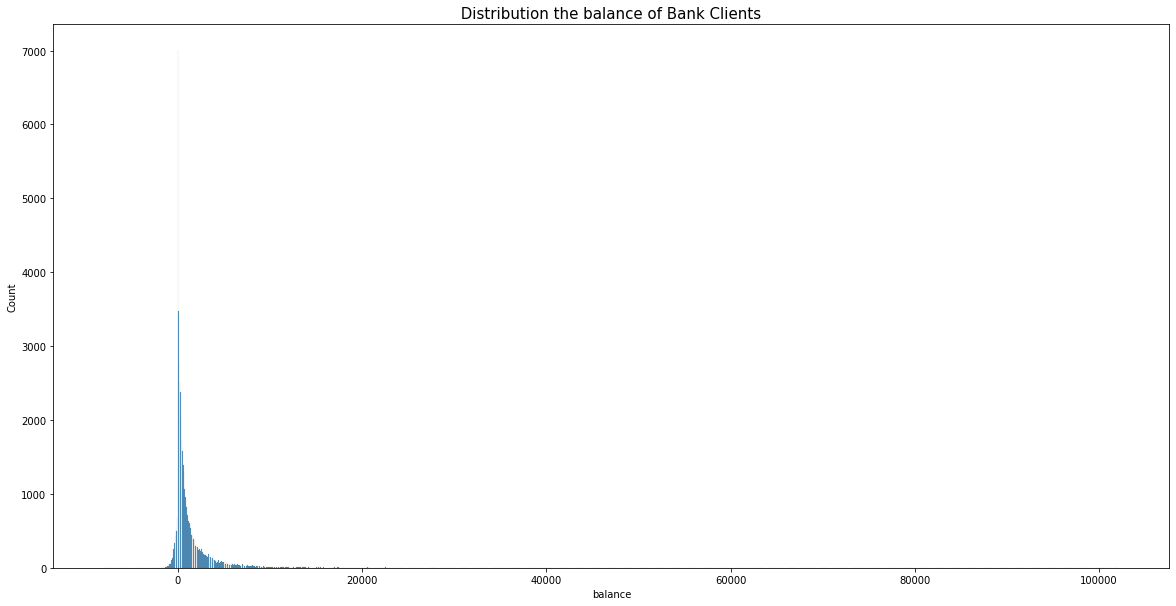

In [25]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the balance of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="balance" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [26]:
# The unquie value in coulmn (housing)
df['housing'].unique()

array(['yes', 'no'], dtype=object)

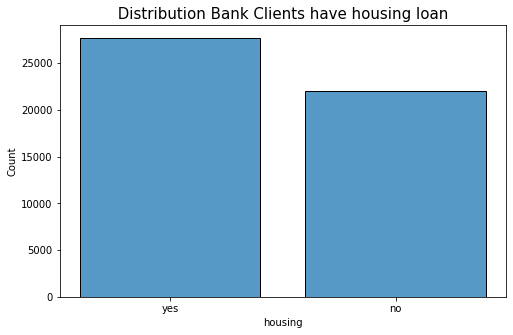

In [27]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Bank Clients have housing loan ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="housing" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [28]:
# The unquie value in coulmn (loan)
df['loan'].unique()

array(['no', 'yes'], dtype=object)

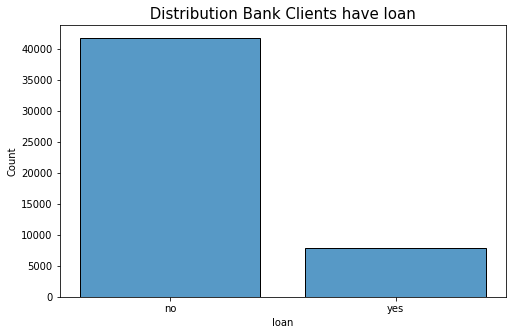

In [29]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Bank Clients have loan ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="loan" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [30]:
# The unquie value in coulmn (contact)
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

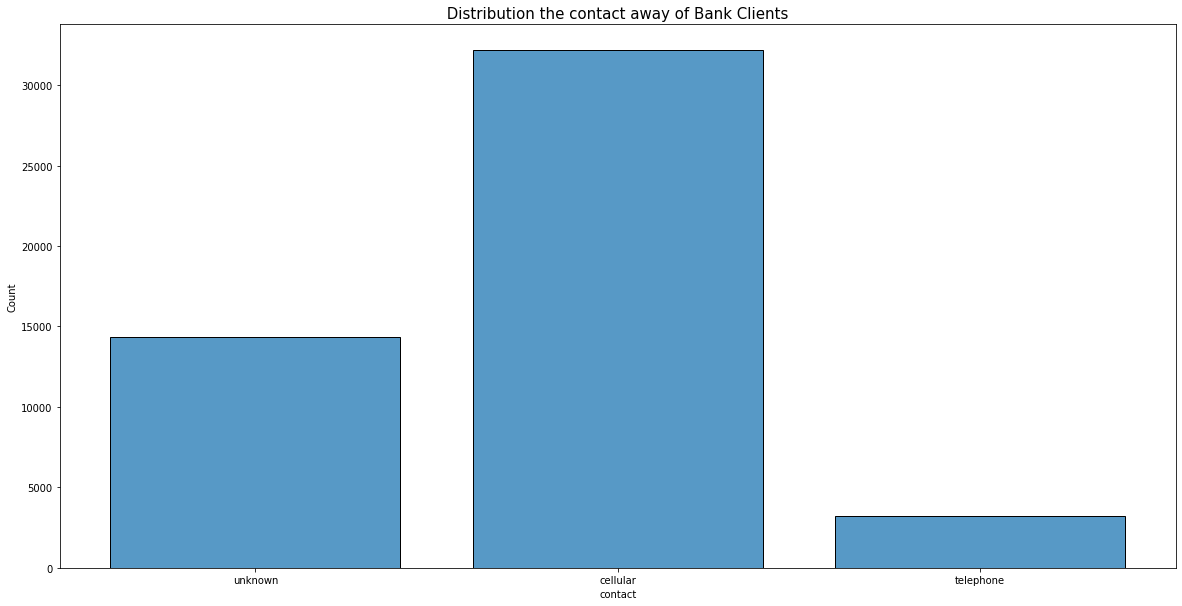

In [31]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the contact away of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="contact" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [32]:
# The unquie value in coulmn (day)
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

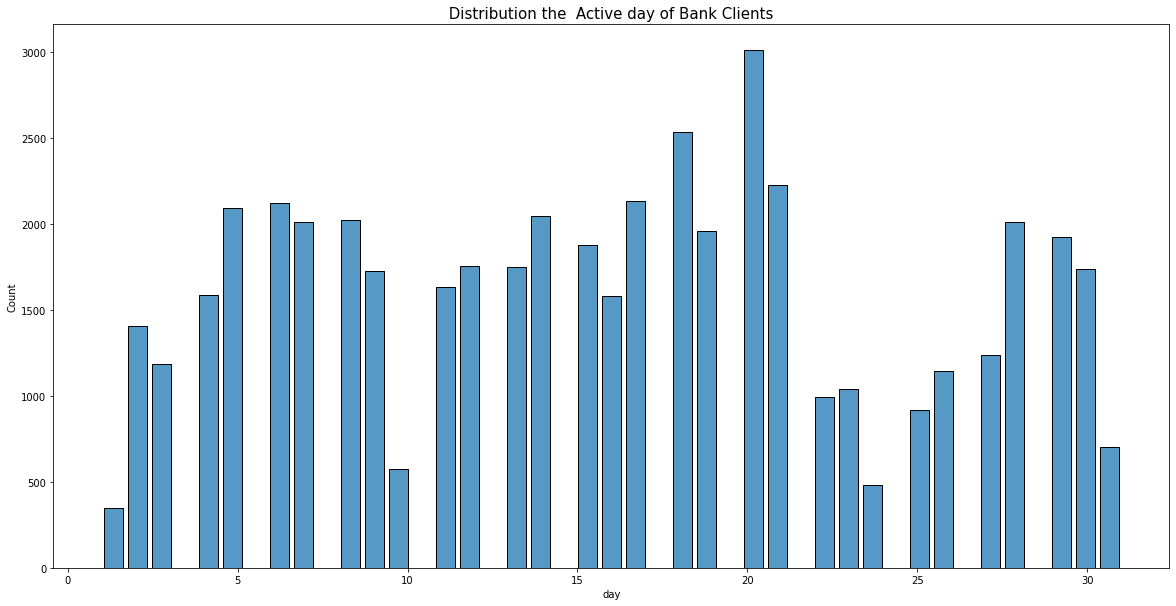

In [33]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the  Active day of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="day" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [34]:
# The unquie value in coulmn (month)
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

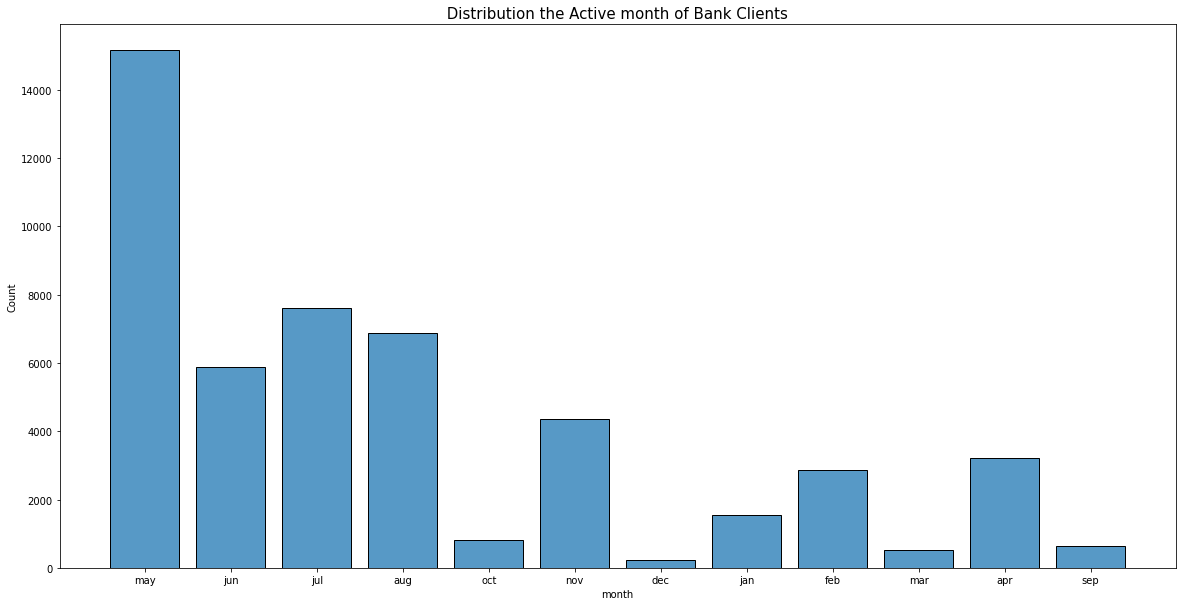

In [35]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the Active month of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="month" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [36]:
# The unquie value in coulmn (duration)
df['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

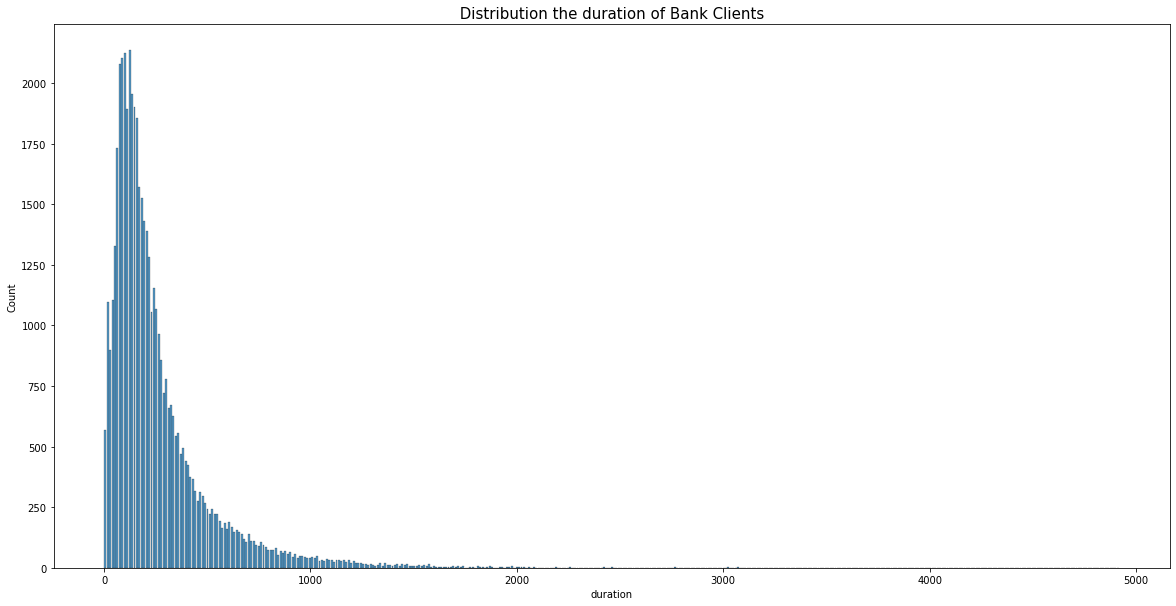

In [37]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the duration of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="duration" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [38]:
# The unquie value in coulmn (campaign)
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

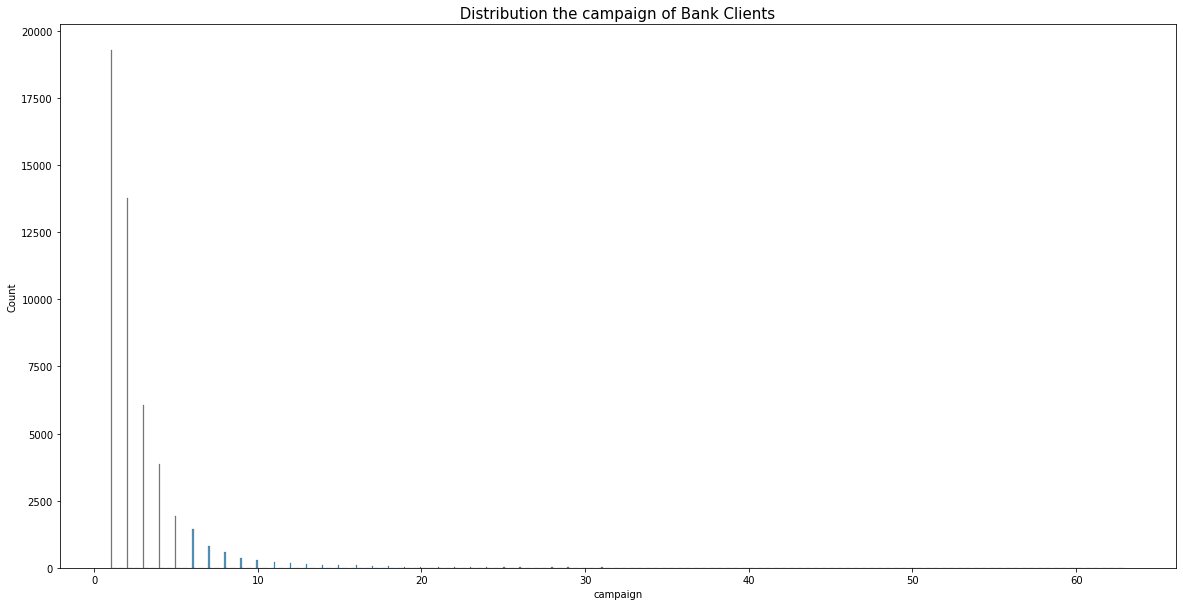

In [39]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the campaign of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="campaign" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [40]:
# The unquie value in coulmn (pervious)
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

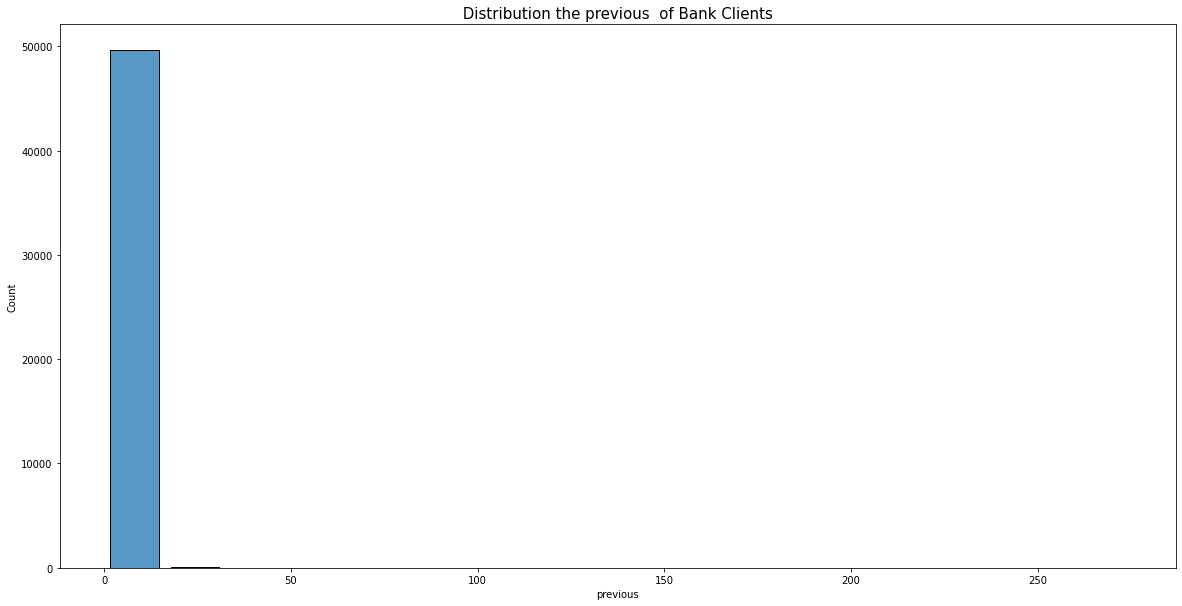

In [41]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the previous  of Bank Clients ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="previous" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [42]:
# The unquie value in coulmn (pdays)
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

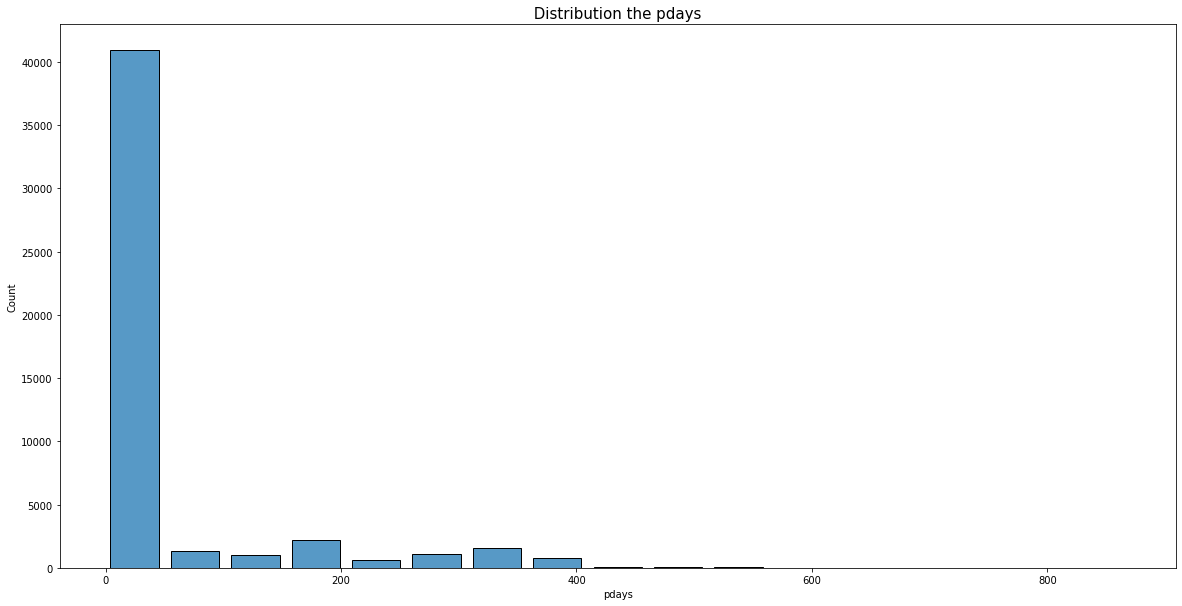

In [43]:
# Figure size
plt.figure(figsize=(20,10))

# Figure title
plt.title(" Distribution the pdays ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="pdays" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

In [44]:
# The unquie value in coulmn (y)
df['y'].unique()

array(['no', 'yes'], dtype=object)

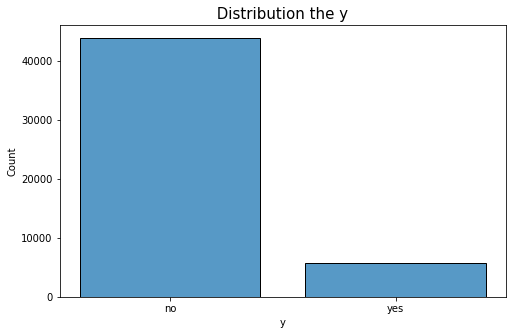

In [45]:
# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution the y ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="y" , common_norm=False,shrink=.8,multiple="dodge")

# Figure show
plt.show()

<hr>

#### 2.7. Detect Outliers

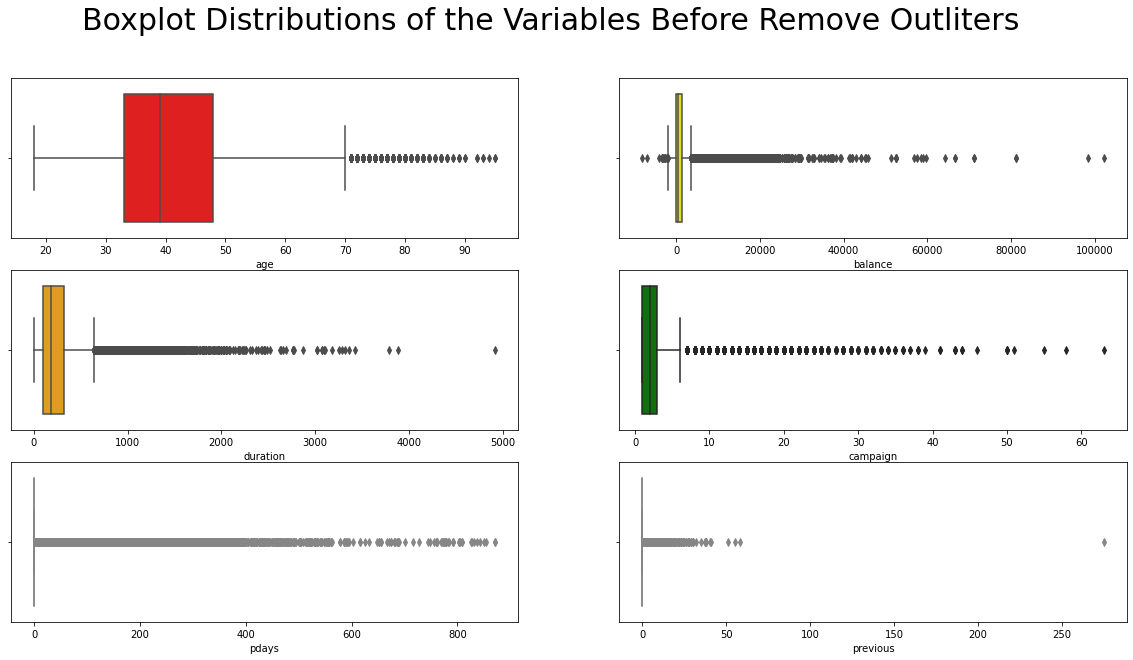

In [46]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables Before Remove Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [47]:
cols = ['pdays', 'campaign', 'previous', 'duration' , 'age' , 'balance'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

In [48]:
df.shape

(30984, 17)

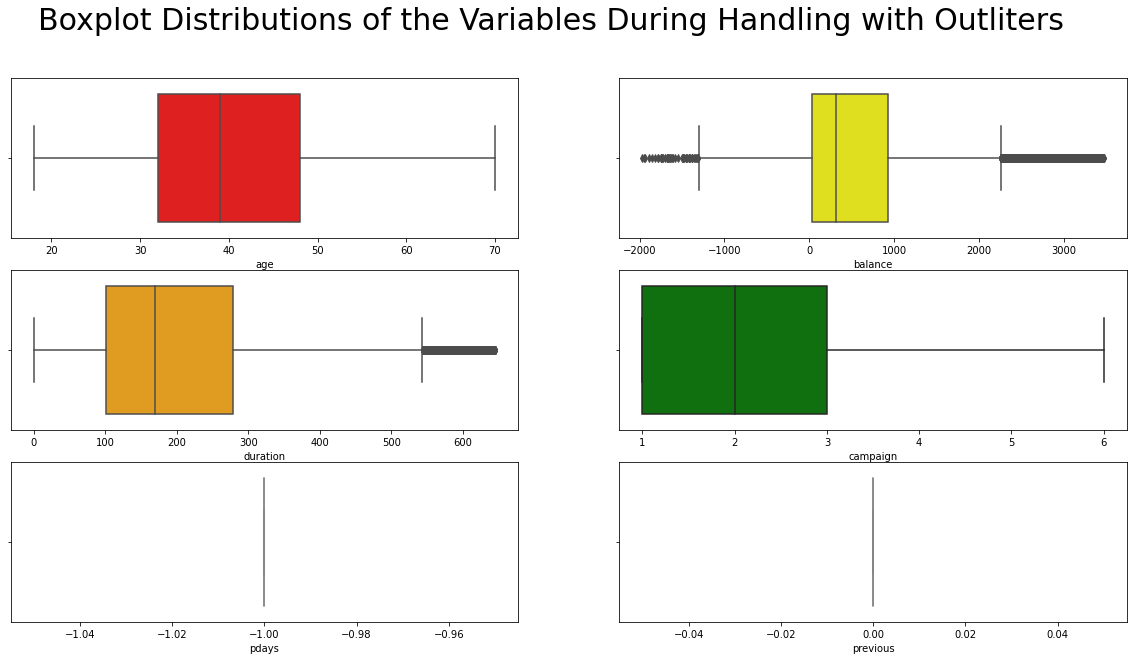

In [49]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [50]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

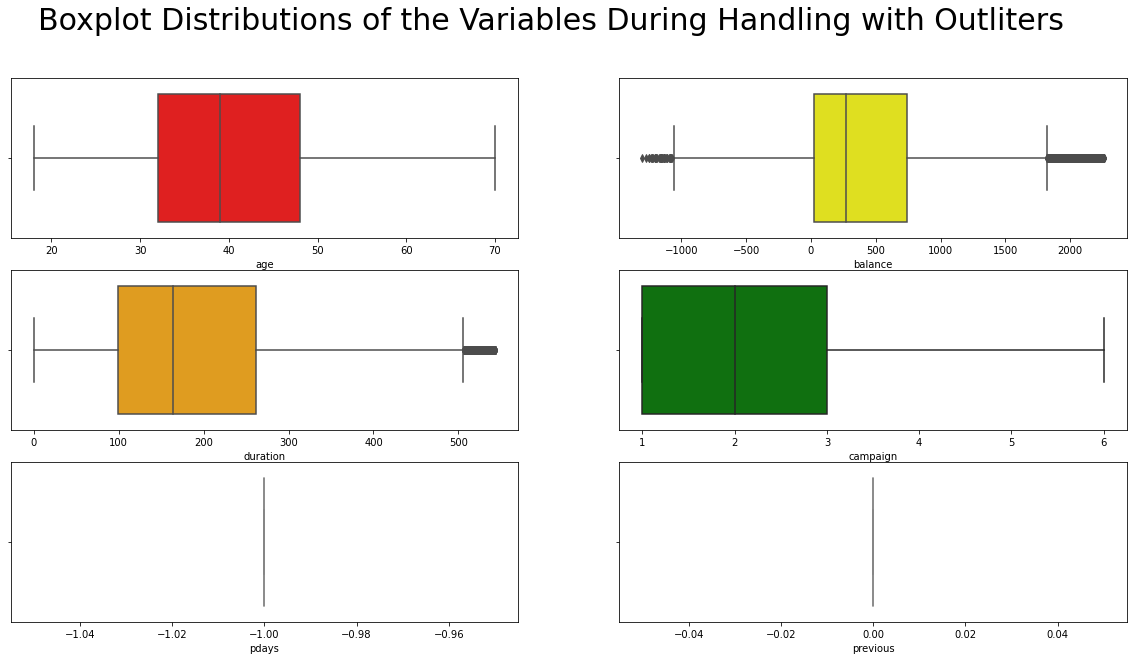

In [51]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [52]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

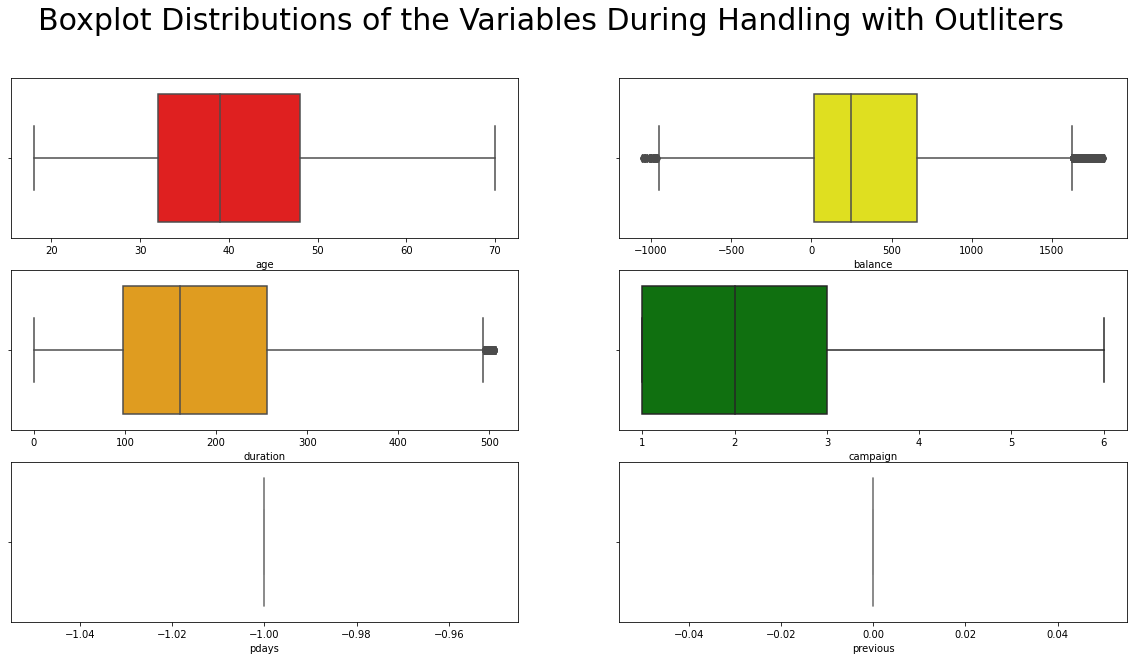

In [53]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [54]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

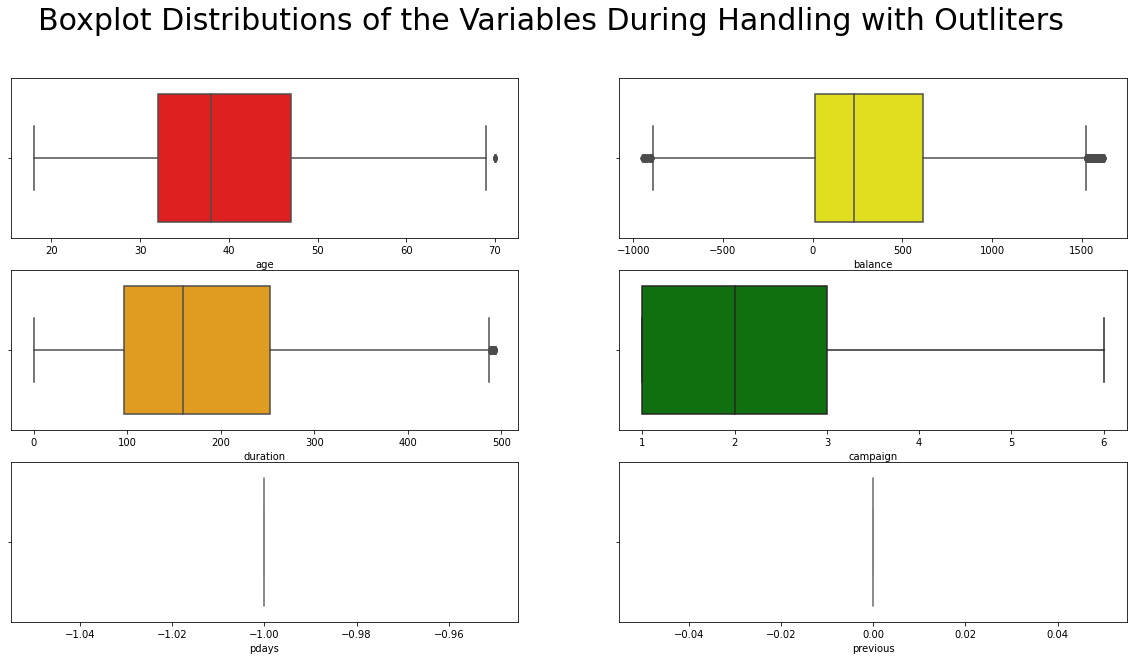

In [55]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [56]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

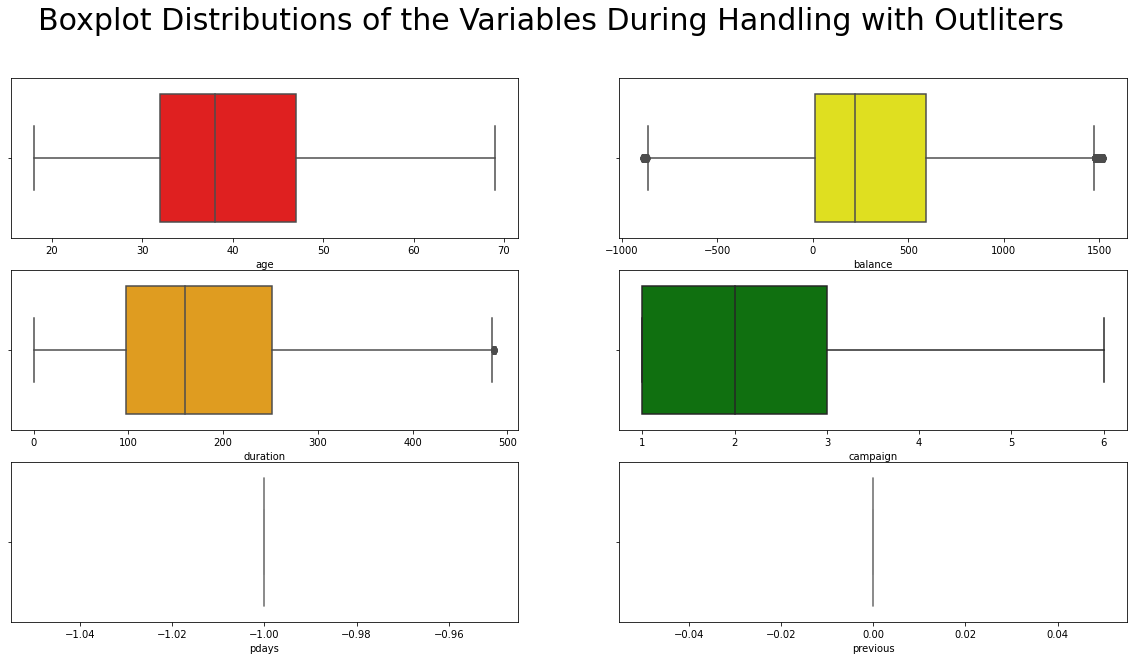

In [57]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [58]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

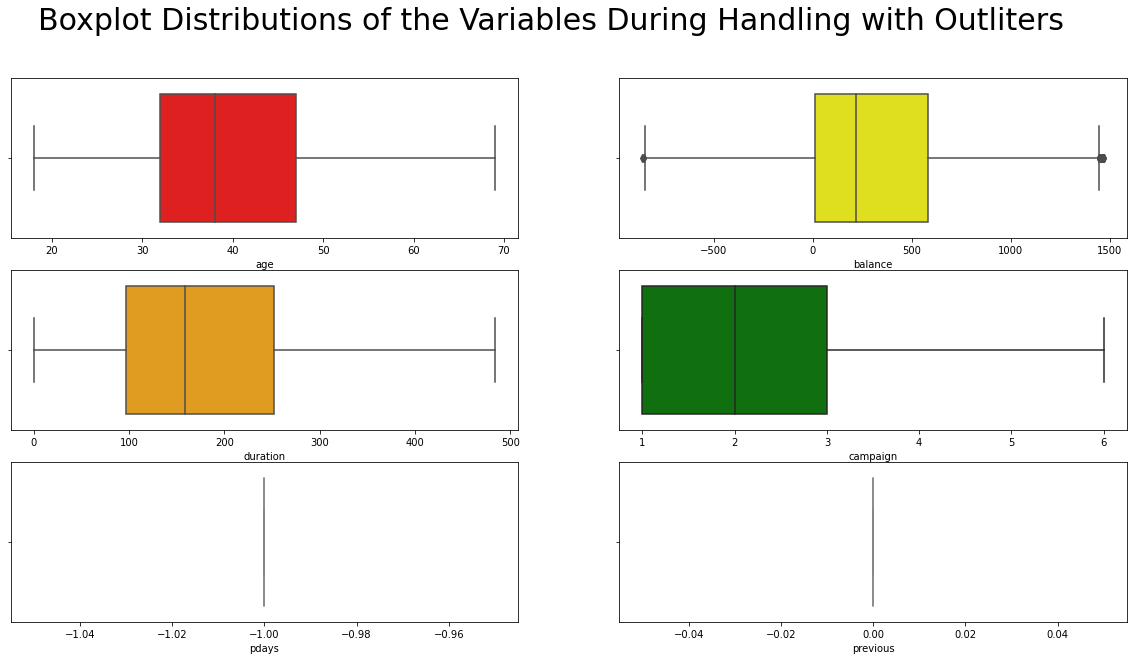

In [59]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [60]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

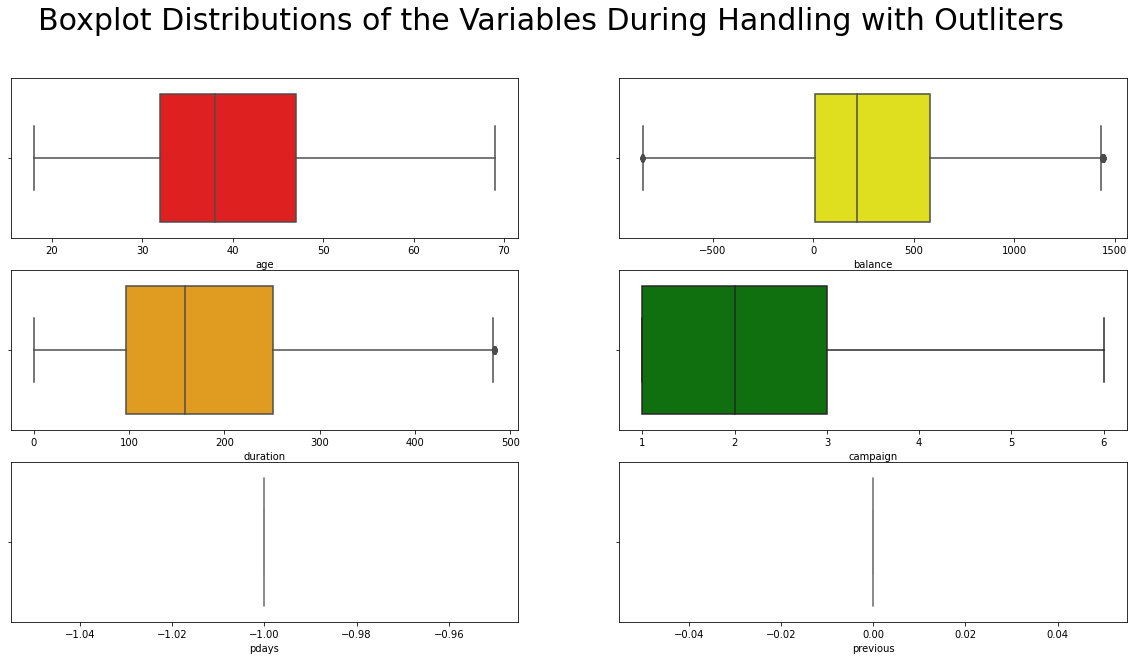

In [61]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [62]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

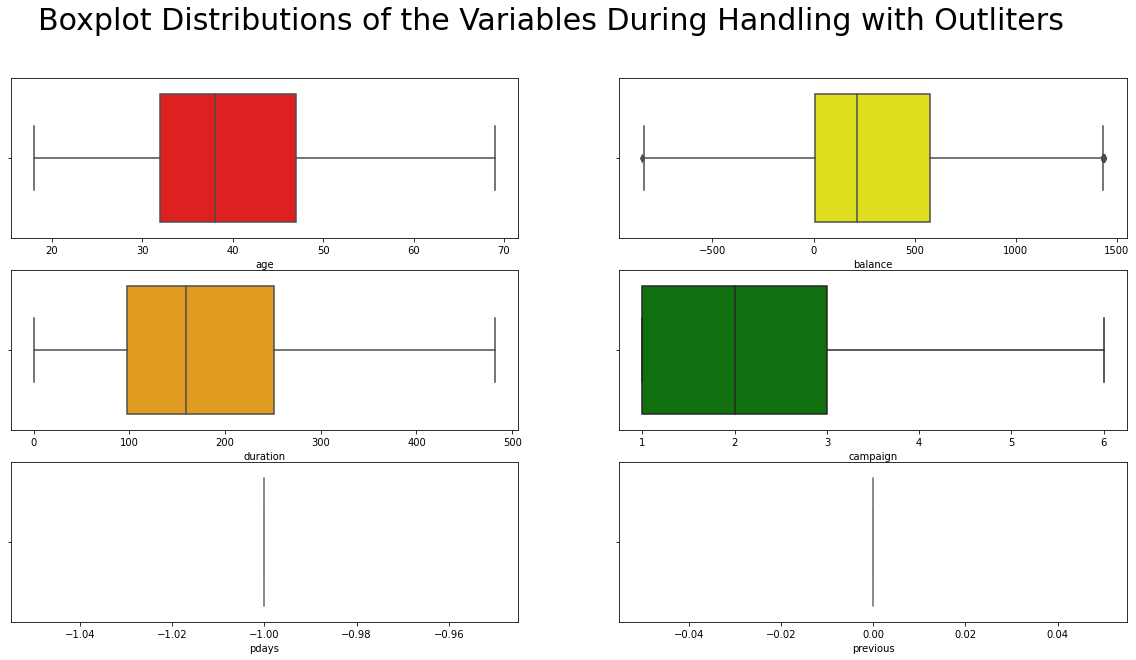

In [63]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [64]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

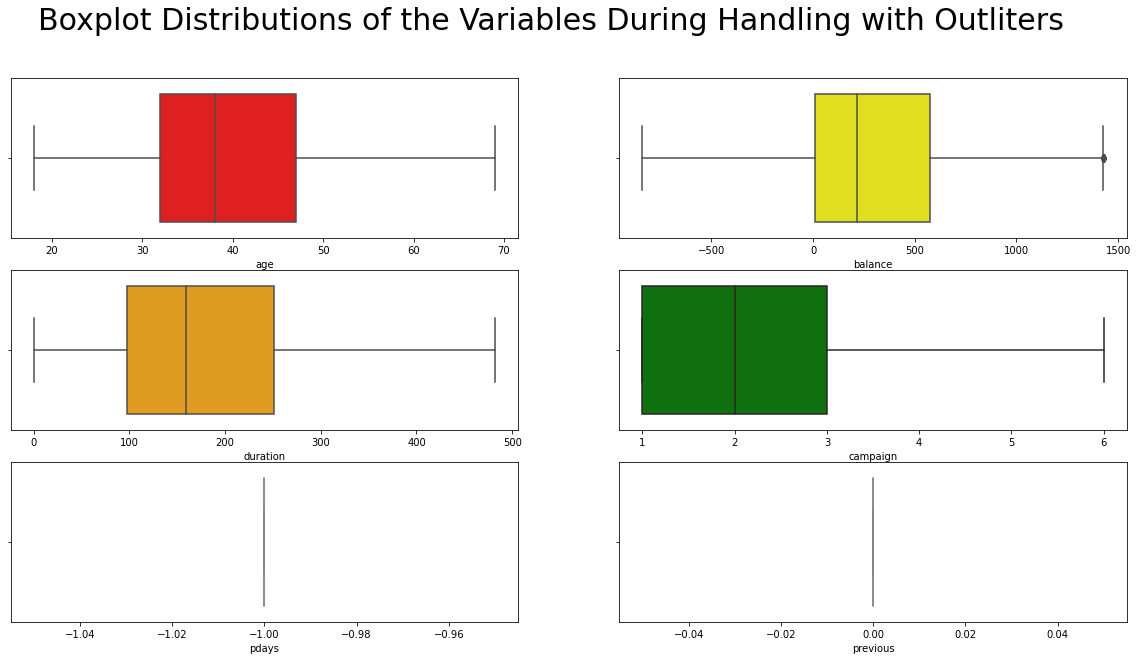

In [65]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables During Handling with Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

In [66]:
cols = [ 'duration' ,'balance','age'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

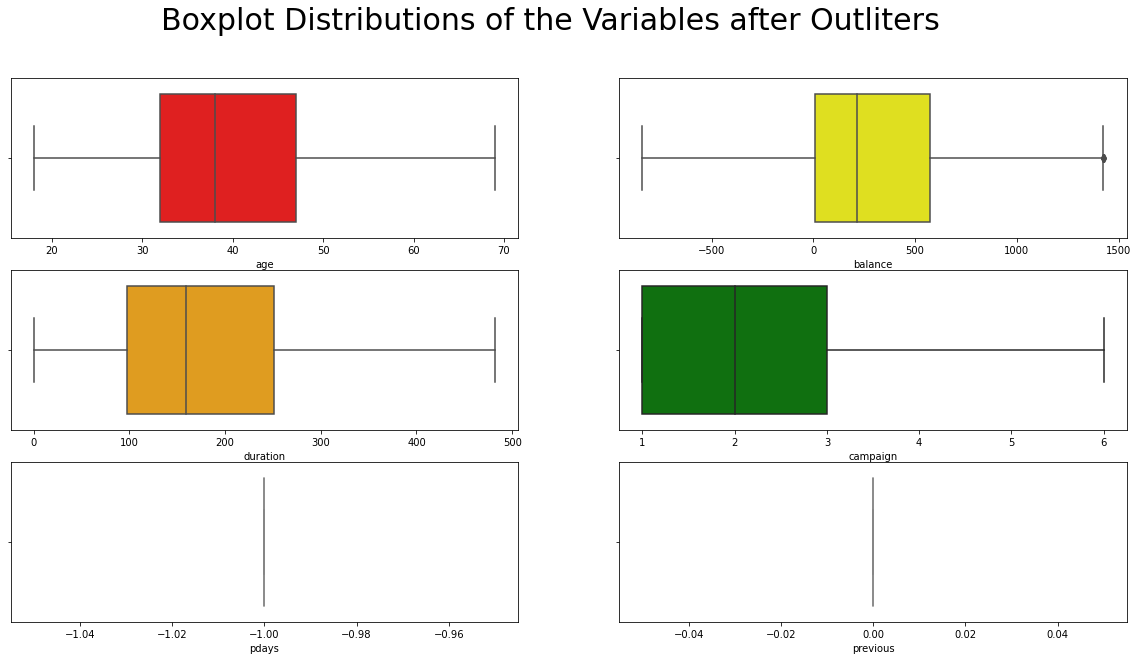

In [67]:
# Detect Outliers
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3,2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables after Outliters',fontsize=30)

sns.boxplot(ax=axes[0,0], x='age',color='red', data=df)
sns.boxplot(ax=axes[0,1], x='balance',color='yellow'  , data=df) 
sns.boxplot(ax=axes[1,0], x='duration' , color='orange' , data=df)
sns.boxplot(ax=axes[1,1], x='campaign' , color='green' ,   data=df)
sns.boxplot(ax=axes[2,0], x='pdays' ,color='pink' ,   data=df)
sns.boxplot(ax=axes[2,1], x='previous' ,color='pink' ,   data=df);

##### Summary

- In this stage, I doing many steps 
- Load Libraries and dataset.
- Know the basic information about data by using the same function scuh as head, shape , dtypes , info , describe 
- Checking on missing values
- Checking on duplicates values
- Detecting outliters

<hr>

### 3. Exploratory Data Analysis (EDA)

#### 3.1. What's the jobs for bank clients?

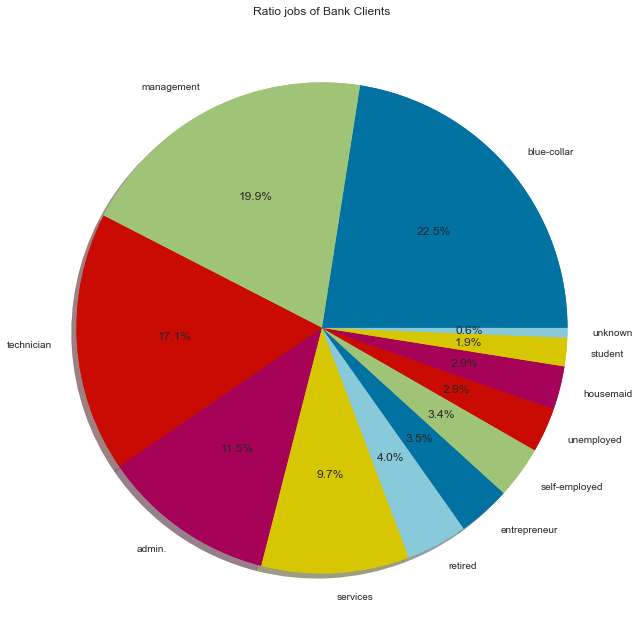

In [35]:
#  jobs
series = df['job'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(11,15))

plt.pie(values) 

# Figure title
plt.title('Ratio jobs of Bank Clients')
# plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.2. What is the marital status of bank clients?

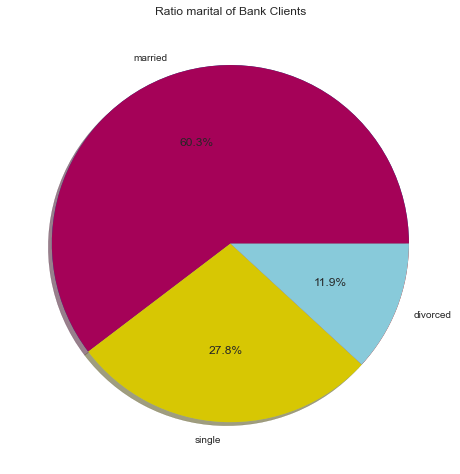

In [36]:
#  marital
series = df['marital'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(8,10))

plt.pie(values) 

# Figure title
plt.title('Ratio marital of Bank Clients')
# plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.3. What is the education status of bank clients?

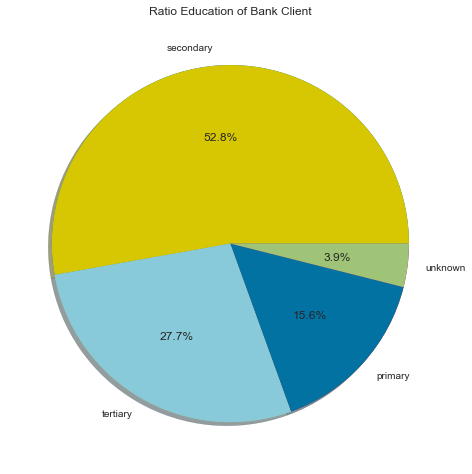

In [37]:
# education
series = df['education'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(8,10))

plt.pie(values) 

# Figure title
plt.title('Ratio Education of Bank Client')
# plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.4. Are bank clients have credit cards?

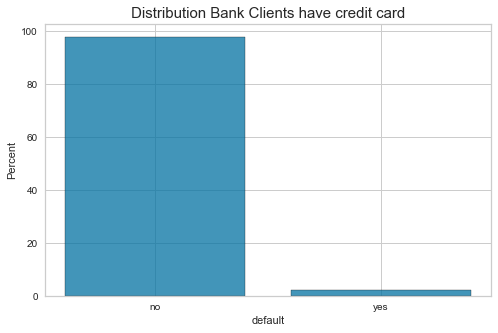

In [38]:
# default

# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution Bank Clients have credit card ", loc="center",fontsize='15')

# plot
sns.histplot(data= df, x="default" , common_norm=False,shrink=.8,multiple="dodge",stat='percent')

# Figure show
plt.show()

#### 3.5. Are bank clients have housing loans?

In [39]:
housing_df = df.groupby(["housing"])\
.count()["month"]

housing_df.head()

housing
no     13786
yes    17198
Name: month, dtype: int64

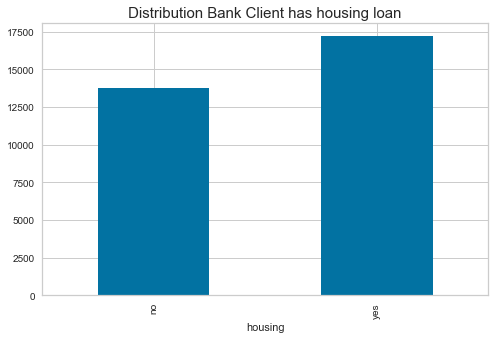

In [40]:
# plot
housing_df.plot(kind='bar',figsize=(8,5))

#plot title
plt.title(" Distribution Bank Client has housing loan ",fontsize="15");

#### 3.6. Are bank clients have personal loans?

In [41]:
loan_df = df.groupby(["loan"])\
.count()["month"]

loan_df.head()

loan
no     25562
yes     5422
Name: month, dtype: int64

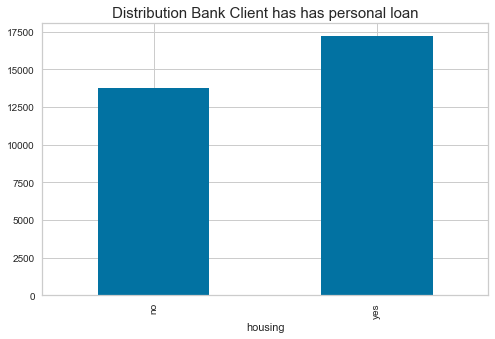

In [42]:
# plot
loan_df.plot(kind='bar',figsize=(8,5))

#plot title
plt.title(" Distribution Bank Client has has personal loan ",fontsize="15");

#### 3.7. what's the method contact with bank clients?

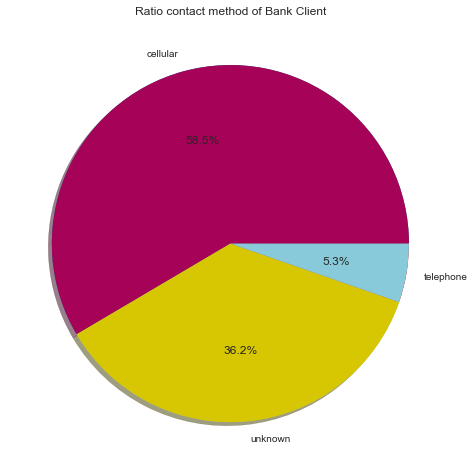

In [43]:
# contact
series = df['contact'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(8,10))

plt.pie(values) 

# Figure title
plt.title('Ratio contact method of Bank Client')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.8. what's the last contact month of the year of bank clients?

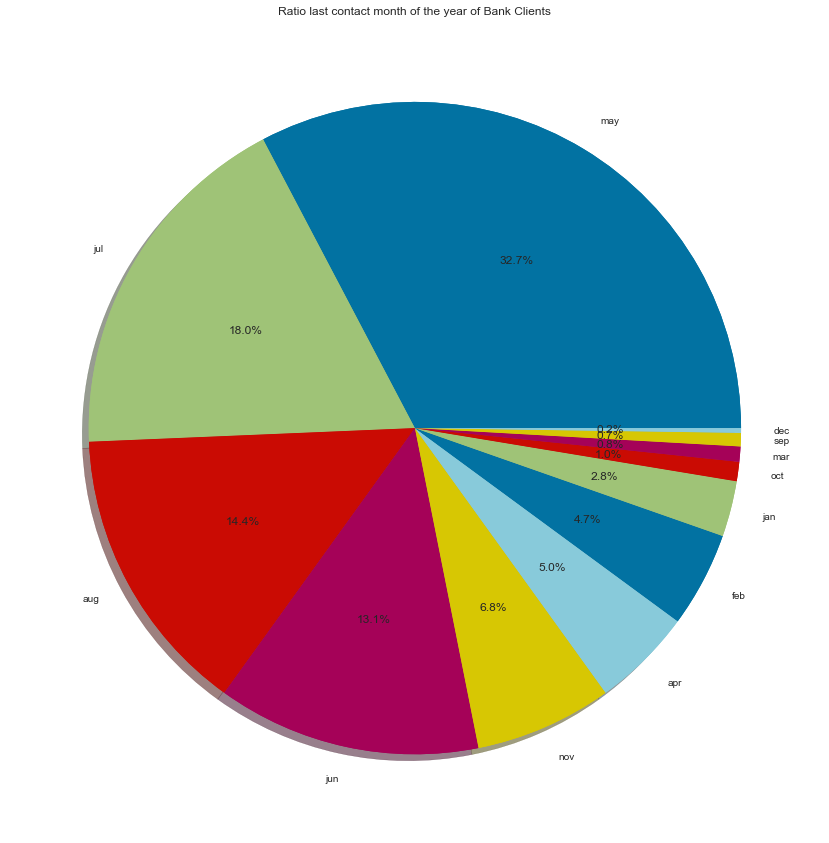

In [44]:
# contact
series = df['month'].value_counts()

labels = series.index
values = series.values

# Figure size
plt.figure(figsize=(15,15))

plt.pie(values) 

# Figure title
plt.title('Ratio last contact month of the year of Bank Clients')

#plot
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

#### 3.9. Do clients subscribe to a term deposit based on the last contact duration (in seconds)?

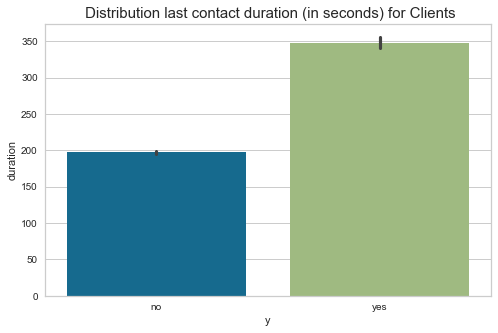

In [45]:
# Duration 

# Figure size
plt.figure(figsize=(8,5))

# Figure title
plt.title(" Distribution last contact duration (in seconds) for Clients", loc="center",fontsize='15')

#plot
sns.barplot(data= df, x="y" ,y="duration")

# Figure show
plt.show()

#### 3.10. what's the method of contact performed during this campaign by contacting?

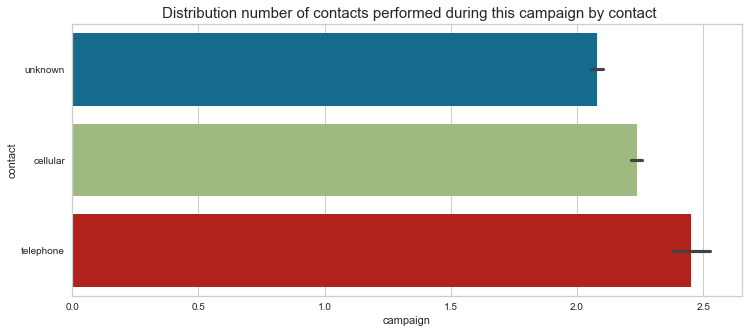

In [46]:
# campign

# Figure size
plt.figure(figsize=(12,5))

# Figure title
plt.title(" Distribution number of contacts performed during this campaign by contact", loc="center",fontsize='15')

#plot
sns.barplot(data= df, x="campaign",y='contact')

# Figure show
plt.show()

#### 3.11. what's the highest and lowest month number of a contact in the campaign?

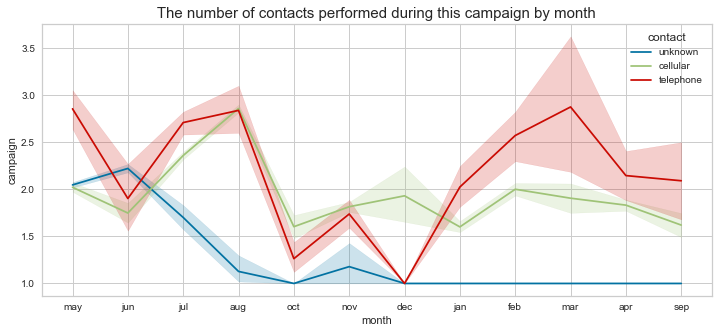

In [47]:
# Figure size
plt.figure(figsize=(12,5))

#figure title
plt.title(" The number of contacts performed during this campaign by month ", loc="center",fontsize='15')

#plot
sns.lineplot(data= df, x='month' , y="campaign" , hue='contact')

# show plot
plt.show()

### 3.12. what's the last contact duration performed during this campaign by month?

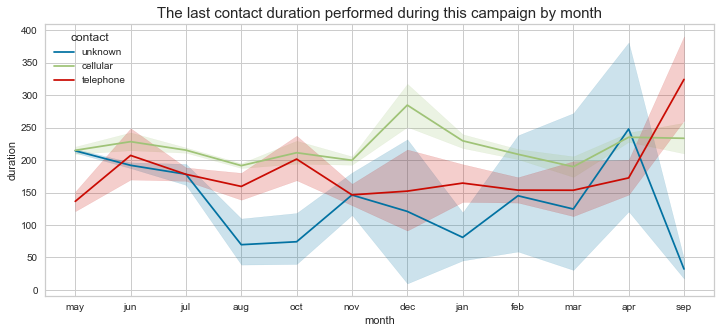

In [48]:
# Figure size
plt.figure(figsize=(12,5))

#figure title
plt.title(" The last contact duration performed during this campaign by month ", loc="center",fontsize='15')

#plot
sns.lineplot(data= df, x='month' , y="duration" , hue='contact')

# show plot
plt.show()

### 3.13 Distribution campaign by jobs based on  clients have credit card 

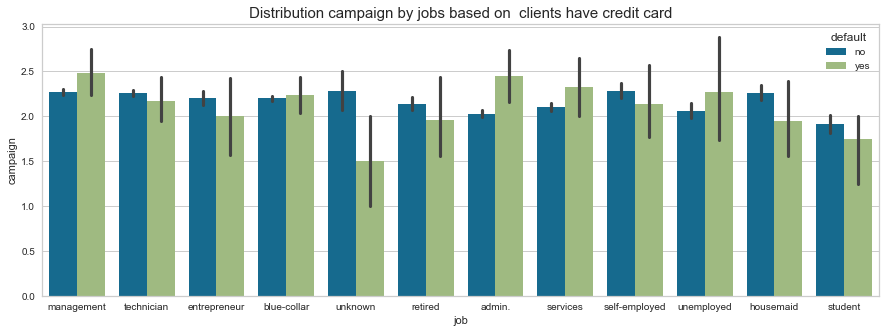

In [49]:
# Figure size
plt.figure(figsize=(15,5))

#figure title
plt.title(" Distribution campaign by jobs based on  clients have credit card ", loc="center",fontsize='15')

#plot
sns.barplot(data= df, x="job" , y="campaign" , hue='default')

# show plot
plt.show()

#### 3.14. Distribution duration by month based on y

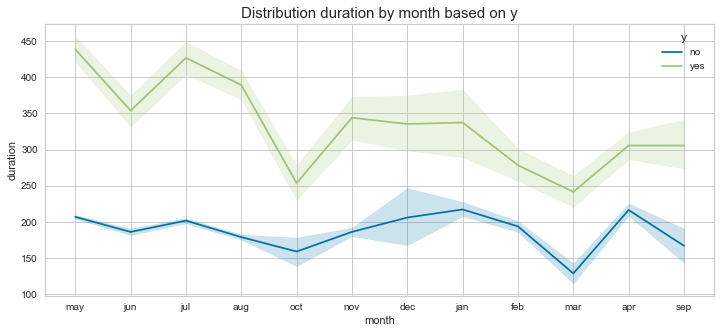

In [50]:
# Figure size
plt.figure(figsize=(12,5))

#figure title
plt.title(" Distribution duration by month based on y ", loc="center",fontsize='15')

#plot
sns.lineplot(data= df, x='month' , y="duration" , hue='y')

# show plot
plt.show()

##### Summary

- <b>In this stage, I have these results</b>
- The top 5 jobs for the client's bank: blue-collar (22.5%), management (19.9%),technician (17.1%), admin (11.5%), and services (9.7%)<br>
  The lowest 5 jobs for the client's bank: self-employed (3.4%),unemployed (2.9%),housemaid (2.9%),student (1.9%), and unknown (0.6%).
- The ratio marital of bank clients divide to 3 types married(60.3%), single(27.8%), and divorced(11.9%).
- The ratio education of bank clients divide to 4 types Secondary(52.8%), tereiary(27.7%), married(15.6%), and unkmown(3.9%).
- The ratio bank clients have cridet card (98% no) and (2% yes).
- The number of clients that have housing loans (55.51% yes) and (44.49% no).
- The number of clients that have personal loans (17.50 % yes) and (82.50% no).
- The ratio contact method of Bank Client 3 types cellular(58.5%), unknown(36.2%), and telephone(15.6%).
- The ratio last contact month of year of Bank Clients.
- The top 5 months active Ratio last contact month of the year of Bank Clients: may (32.7%), Jul (18.0%), Aug (14.4%), Jun (13.1%), and Nov (6.8%) <br>
  The lowest 5 months active Ratio last contact month of the year of Bank Clients: Jan (2.8%), Oct (1.0%),Mar (0.8%),Sep (0.7%), and Dec (0.2%).
- The number of Clients who accept the campaign in the last contact duration (in seconds) is higher than the rejected.
- The number of contacts performed during this campaign sorted from top to down telephone, cellular and unknown.
- The number of contacts performed during this campaign by month sorted from top to down telephone, cellular and unknown.
- The clients that have credit cards more than they not based on jobs. 
- The distribution duration by month based on y  who accept is higher than rejected.

# Done